In [6]:
# import pyscipopt as scip
import gurobipy as gp

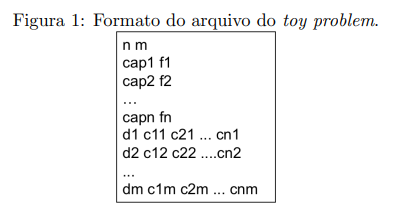

In [7]:
def main():
    # Leitura dos dados
    for i in range(5,6):

        file = open("InstanciasLiteratura\Adaptada-wlp0%s.txt" % i, "r")

        n, m = [int(x) for x in file.readline().split()]
        M, f, d, c = [], [], [], []

        for _ in range(n):
            M_aux, f_aux = [int(x) for x in file.readline().split()]
            M.append(M_aux), f.append(f_aux)

        for _ in range(m):
            aux = [int(x) for x in file.readline().split()]
            d.append(aux[0]), c.append(aux[1:])
        n = list(range(n)) 
        m = list(range(m))
        flp(n, m, d, M, f, c)
        flp_r(n, m, d, M, f, c)
        flp_ra(n, m, d, M, f, c)
main()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-26
Set parameter TimeLimit to value 300
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1781683 rows, 890400 columns and 3559800 nonzeros
Model fingerprint: 0xbf4469fa
Variable types: 889800 continuous, 600 integer (600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 446461.00000
Presolve removed 1779600 rows and 0 columns (presolve time = 5s) ...
Presolve removed 1779600 rows and 0 columns
Presolve time: 6.55s
Presolved: 2083 rows, 890400 columns, 1780200 nonzeros
Variable types: 889800 continuous, 600 integer (600 binary)
Deterministic concurrent LP opti

# Tarefa 1

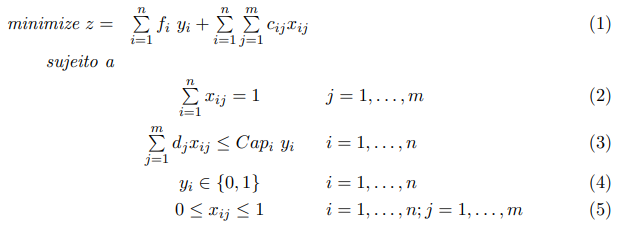

In [2]:
# I = Dados 
# J = Dados
# d = demanda
# M = capacidade
# f = custo fixo
# c = custo variavel 
# s = solver => s(SCIP) ou g(gurobi)
def flp(I, J, d, M, f, c):
    # Criação do modelo
    model = gp.Model("flp")

    # Variáveis de decisão
    x, y = {}, {}

    # Adiciona variáveis binárias y[i] para indicar se a instalação i está aberta
    for i in I:
        y[i] = model.addVar(vtype=gp.GRB.BINARY, name="y(%s)" % (i))

    # Adiciona variáveis contínuas x[i, j] para representar a fração da demanda da i atendida por j
    for i in I:
        for j in J:
            x[i, j] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="x(%s,%s)" % (i, j))

    # Restrições
    # Cada demanda deve ser atendida por exatamente uma instalação
    for j in J:
        model.addConstr(gp.quicksum(x[i, j] for i in I) == 1, "Demand(%s)" % (j))

    # A demanda de cada instalação não pode exceder sua capacidade se estiver aberta
    for i in I:
        model.addConstr(gp.quicksum(d[j] * x[i, j] for j in J) <= M[i] * y[i], "Capacity(%s)" % (i))

    # Garante que as variáveis x[i, j] estejam no intervalo correto
    for i in I:
        for j in J:
            model.addConstr(x[i, j] >= 0, "NonNeg(%s,%s)" % (i, j))
            model.addConstr(x[i, j] <= 1, "UpperBound(%s,%s)" % (i, j))

    # Função Objetivo
    # Minimiza os custos de abertura de instalações e os custos de atendimento das demandas
    model.setObjective(gp.quicksum(f[i] * y[i] for i in I) + gp.quicksum(x[i, j] * c[j][i] for i in I for j in J),
                       gp.GRB.MINIMIZE)
                       
    model.setParam('TimeLimit', 300)
    # Otimiza o modelo
    model.optimize()

    # Retorna o modelo
    return model

## Maximizando Lucro

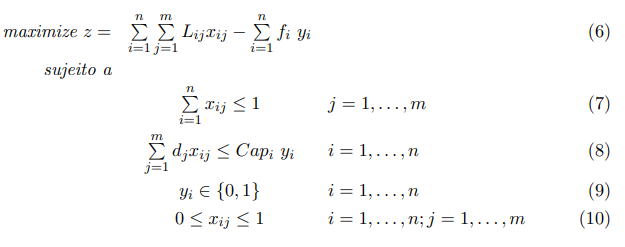

In [7]:
# I = Dados 
# J = Dados
# d = demanda
# M = capacidade
# f = custo fixo
# L = e o lucro obtido se a facilidade i atender ao cliente j 
def flp(I, J, d, M, f, L):
    # Criação do modelo
    model = gp.Model("flp")

    # Variáveis de decisão
    x, y = {}, {}

    # Adiciona variáveis binárias y[i] para indicar se a instalação i está aberta
    for i in I:
        y[i] = model.addVar(vtype=gp.GRB.BINARY, name="y(%s)" % (i))

    # Adiciona variáveis contínuas x[i, j] para representar a fração da demanda da i atendida por j
    for i in I:
        for j in J:
            x[i, j] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="x(%s,%s)" % (i, j))

    # Restrições
    # Cada demanda deve ser atendida por exatamente uma instalação
    for j in J:
        model.addCons(gp.quicksum(x[i, j] for i in I) == 1, "Demand(%s)" % (j))

    # A demanda de cada instalação não pode exceder sua capacidade se estiver aberta
    for i in I:
        model.addCons(gp.quicksum(d[j] * x[i, j] for j in J) <= M[i] * y[i], "Capacity(%s)" % (i))

    # Garante que as variáveis x[i, j] estejam no intervalo correto
    for i in I:
        for j in J:
            model.addCons(x[i, j] >= 0, "NonNeg(%s,%s)" % (i, j))
            model.addCons(x[i, j] <= 1, "UpperBound(%s,%s)" % (i, j))

    # Função Objetivo
    # Maximiza os lucros
    model.setObjective(gp.quicksum(L[i,j]*x[i,j] for i in I for j in J) - gp.quicksum(f[i]*y[i] for i in I),
                       gp.GRB.MAXMIZE)

    # Otimiza o modelo
    model.optimize()

    # Retorna o modelo
    return model


# Tarefa 2, 3, 4

## Linearmente Relaxado

In [3]:
# I = Dados 
# J = Dados
# d = demanda
# M = capacidade
# f = custo fixo
# c = custo variavel 
def flp_r(I, J, d, M, f, c):
    # Criação do modelo
    model = gp.Model("flp")

    # Variáveis de decisão
    x, y = {}, {}

    # Adiciona variáveis binárias y[i] para indicar se a instalação i está aberta
    for i in I:
        y[i] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="y(%s)" % (i))
        model.addConstr(y[i] >= 0, "NonNeg(%s)" % (i))
        model.addConstr(y[i] <= 1, "UpperBound(%s)" % (i))

    # Adiciona variáveis contínuas x[i, j] para representar a fração da demanda da i atendida por j
    for i in I:
        for j in J:
            x[i, j] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="x(%s,%s)" % (i, j))

    # Restrições
    # Cada demanda deve ser atendida por exatamente uma instalação
    for j in J:
        model.addConstr(gp.quicksum(x[i, j] for i in I) == 1, "Demand(%s)" % (j))

    # A demanda de cada instalação não pode exceder sua capacidade se estiver aberta
    for i in I:
        model.addConstr(gp.quicksum(d[j] * x[i, j] for j in J) <= M[i] * y[i], "Capacity(%s)" % (i))

    # Garante que as variáveis x[i, j] estejam no intervalo correto
    for i in I:
        for j in J:
            model.addConstr(x[i, j] >= 0, "NonNeg(%s,%s)" % (i, j))
            model.addConstr(x[i, j] <= 1, "UpperBound(%s,%s)" % (i, j))

    # Função Objetivo
    # Minimiza os custos de abertura de instalações e os custos de atendimento das demandas
    model.setObjective(gp.quicksum(f[i] * y[i] for i in I) + gp.quicksum(x[i, j] * c[j][i] for i in I for j in J),
                       gp.GRB.MINIMIZE)
                       
    model.setParam('TimeLimit', 300)
    # Otimiza o modelo
    model.optimize()

    # Retorna o modelo
    return model

## Restrições alteradas

In [4]:

# I = Dados 
# J = Dados
# d = demanda
# M = capacidade
# f = custo fixo
# c = custo variavel 
def flp_ra(I, J, d, M, f, c):
    # Criação do modelo
    model = gp.Model("flp")

    # Variáveis de decisão
    x, y = {}, {}

    # Adiciona variáveis binárias y[i] para indicar se a instalação i está aberta
    for i in I:
        y[i] = model.addVar(vtype=gp.GRB.BINARY, name="y(%s)" % (i))
        # model.addConstr(y[i] >= 0, "NonNeg(%s)" % (i))
        # model.addConstr(y[i] <= 1, "UpperBound(%s)" % (i))

    # Adiciona variáveis contínuas x[i, j] para representar a fração da demanda da i atendida por j
    for i in I:
        for j in J:
            x[i, j] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="x(%s,%s)" % (i, j))

    # Restrições
    # Cada demanda deve ser atendida por exatamente uma instalação
    for j in J:
        model.addConstr(gp.quicksum(x[i, j] for i in I) == 1, "Demand(%s)" % (j))

    # A demanda de cada instalação não pode exceder sua capacidade se estiver aberta
    for i in I:
        # Alterando restrição (3)
        model.addConstr(gp.quicksum(d[j] * x[i, j] for j in J) <= M[i], "Capacity(%s)" % (i))

    # Garante que as variáveis x[i, j] estejam no intervalo correto
    for i in I:
        for j in J:
            model.addConstr(x[i, j] >= 0, "NonNeg(%s,%s)" % (i, j))
            model.addConstr(x[i, j] <= 1, "UpperBound(%s,%s)" % (i, j))
            model.addConstr(x[i, j] <= y[i])

    # Função Objetivo
    # Minimiza os custos de abertura de instalações e os custos de atendimento das demandas
    model.setObjective(gp.quicksum(f[i] * y[i] for i in I) + gp.quicksum(x[i, j] * c[j][i] for i in I for j in J),
                       gp.GRB.MINIMIZE)
                       
    model.setParam('TimeLimit', 300)
    # Otimiza o modelo
    model.optimize()

    # Retorna o modelo
    return model

# Tarefa 5 e 6
## Distribuição de Água

Podemos utilizar a modelagem de localização de facilidades para resolver o sistema de distribuição de água em bairros da cidade.

### Dados do Problema:

- `n`: Número de locais onde podem ser instaladas os reservatórios d'água.
- `m`: Número de bairros que devem ser atendidos.
- `f_i`: Custo fixo da instalação do reservatório d'água no local i, onde i ∈ {1, ..., n}.
- `c_ij`: Custo de transporte da água i (i ∈ {1, ..., n}) para o bairro j (j ∈ {1, ..., m}).
- `d_j`: Demanda do bairro j em litros(j ∈ {1, ..., m}).
- `Cap_i`: Capacidade da caixa d'água i em litros (i ∈ {1, ..., n}).

### Variáveis de Decisão:

- `y_i`: Variável binária que é 1 se o reservatório d'água no local i está instalado e aberto, e 0 caso contrário, onde i ∈ {1, ..., n}.
- `x_ij`: Variável contínua que representa a fração da demanda do bairro j atendida pelo reservatóriod'água no local i (0 ≤ x_ij ≤ 1), onde i ∈ {1, ..., n} e j ∈ {1, ..., m}.

### Objetivo:

Minimizar o custo total, que inclui custos fixos e custos de transporte:

`Minimizar ∑(f_i * y_i) + ∑∑(c_ij * x_ij)`

### Restrições:

1. A demanda de cada bairro deve ser atendida:

`∑x_ij ≥ d_j ∀ j ∈ {1, ..., m}`

2. A capacidade de cada reservatório d'água não pode ser excedida:

`∑x_ij ≤ Cap_i * y_i ∀ i ∈ {1, ..., n}`

3. As variáveis `x_ij` estão entre 0 e 1:

`0 ≤ x_ij ≤ 1 ∀ i ∈ {1, ..., n}, ∀ j ∈ {1, ..., m}`

4. A variável `y_i` é binária:

`y_i ∈ {0, 1} ∀ i ∈ {1, ..., n}`


In [10]:
def flp(I, J, d, M, f, c):
    # Criação do modelo
    model = gp.Model("flp")

    # Variáveis de decisão
    x, y = {}, {}

    # Adiciona variáveis binárias y[i] para indicar se a instalação i está aberta
    for i in I:
        y[i] = model.addVar(vtype=gp.GRB.BINARY, name="y(%s)" % (i))

    # Adiciona variáveis contínuas x[i, j] para representar a fração da demanda da i atendida por j
    for i in I:
        for j in J:
            x[i, j] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="x(%s,%s)" % (i, j))

    # Restrições
    # Cada demanda deve ser atendida por exatamente uma instalação
    for j in J:
        model.addConstr(gp.quicksum(x[i, j] for i in I) == 1, "Demand(%s)" % (j))

    # A demanda de cada instalação não pode exceder sua capacidade se estiver aberta
    for i in I:
        model.addConstr(gp.quicksum(d[j] * x[i, j] for j in J) <= M[i] * y[i], "Capacity(%s)" % (i))

    # Garante que as variáveis x[i, j] estejam no intervalo correto
    for i in I:
        for j in J:
            model.addConstr(x[i, j] >= 0, "NonNeg(%s,%s)" % (i, j))
            model.addConstr(x[i, j] <= 1, "UpperBound(%s,%s)" % (i, j))

    # Função Objetivo
    # Minimiza os custos de abertura de instalações e os custos de atendimento das demandas
    model.setObjective(gp.quicksum(f[i] * y[i] for i in I) + gp.quicksum(x[i, j] * c[j][i] for i in I for j in J),
                       gp.GRB.MINIMIZE)
                       
    model.setParam('TimeLimit', 300)
    # Otimiza o modelo
    model.optimize()

    # Retorna o modelo
    return model

# I = Bairros 
# J = Reservatórios
# d = demanda em L
# M = capacidade em L
# f = custo fixo em R$
# c = custo variavel R$
I = {"Cidade Aracy", "Jardim Bosque", "Vila Nery", "Santa Felícia", "Jardim Lutifalla", "Vila Prado", "Vila Boa Vista", "Jockey Club", "Parque Faber"}
J = range(4)
d = {"Cidade Aracy": 500000, "Jardim Bosque": 300000, "Vila Nery": 400000, "Santa Felícia": 800000, "Jardim Lutifalla": 250000, "Vila Prado": 700000, "Vila Boa Vista": 450000, "Jockey Club": 600000, "Parque Faber": 350000}
M = [2000000, 600000, 600000, 1500000]
f = {"Cidade Aracy": 50000, "Jardim Bosque": 30000, "Vila Nery": 25000, "Santa Felícia": 70000, "Jardim Lutifalla": 40000, "Vila Prado": 60000, "Vila Boa Vista": 35000, "Jockey Club": 45000, "Parque Faber": 55000}
c = {"Cidade Aracy": [1000, 2000, 1500, 1200], "Jardim Bosque": [800, 1800, 1200, 1000], "Vila Nery": [900, 1600, 1300, 1100], "Santa Felícia": [1200, 2200, 1700, 1500], "Jardim Lutifalla": [700, 1200, 1000, 800], "Vila Prado": [1100, 2000, 1600, 1300], "Vila Boa Vista": [600, 1500, 1000, 900], "Jockey Club": [1000, 1900, 1400, 1100], "Parque Faber": [850, 1600, 1100, 900]}
flp(I,J,d,M,f,c)

#adicionar restrições de localidade dos reservatórios

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-26


KeyError: 0